<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
from collections import namedtuple   # Convenient to store the data rows

with open(r'C:\Users\escag\es_repo280720\Homework\Unit2\data\chipotle.tsv') as tsvfile:
    tsvreader=csv.reader(tsvfile, delimiter="\t")
    file_nested_list=[]
    for line in tsvreader:
        file_nested_list.append(line)
        

In [2]:
file_nested_list[:10]

[['order_id', 'quantity', 'item_name', 'choice_description', 'item_price'],
 ['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '$3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 '],
 ['2',
  '2',
  'Chicken Bowl',
  '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',
  '$16.98 '],
 ['3',
  '1',
  'Chicken Bowl',
  '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '$10.98 '],
 ['3', '1', 'Side of Chips', 'NULL', '$1.69 '],
 ['4',
  '1',
  'Steak Burrito',
  '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '$11.75 '],
 ['4',
  '1',
  'Steak Soft Tacos',
  '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]',
  '$9.25 ']]

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [3]:
chp_header=file_nested_list[0]

In [4]:
chp_data=file_nested_list[1:]

In [5]:
chp_data[:9]

[['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '$3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 '],
 ['2',
  '2',
  'Chicken Bowl',
  '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',
  '$16.98 '],
 ['3',
  '1',
  'Chicken Bowl',
  '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '$10.98 '],
 ['3', '1', 'Side of Chips', 'NULL', '$1.69 '],
 ['4',
  '1',
  'Steak Burrito',
  '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '$11.75 '],
 ['4',
  '1',
  'Steak Soft Tacos',
  '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]',
  '$9.25 ']]

---

 Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [6]:
import pandas as pd
df=pd.DataFrame(chp_data, columns=chp_header)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   object
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: object(5)
memory usage: 180.7+ KB


In [8]:
df.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NULL,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NULL,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [51]:
df.quantity=df.quantity.astype(int)
df['item_price'] = df['item_price'].replace('\$', '', regex=True).astype(float)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int16  
 1   quantity            4622 non-null   int32  
 2   item_name           4622 non-null   object 
 3   choice_description  4622 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int16(1), int32(1), object(2)
memory usage: 135.5+ KB


In [53]:
df[df.item_name=='Chicken Bowl']

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [54]:
#average price of an order
df.groupby('order_id').item_price.sum().mean()

18.81142857142869

USING JUST LISTS

In [55]:
chp_data

[['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '2.39 '],
 ['2',
  '2',
  'Chicken Bowl',
  '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',
  '16.98 '],
 ['3',
  '1',
  'Chicken Bowl',
  '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '10.98 '],
 ['3', '1', 'Side of Chips', 'NULL', '1.69 '],
 ['4',
  '1',
  'Steak Burrito',
  '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '11.75 '],
 ['4',
  '1',
  'Steak Soft Tacos',
  '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]',
  '9.25 '],
 ['5',
  '1',
  'Steak Burrito',
  '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]',
  '9.25 '],
 ['5', '1', 'Chips and Guacamole', 'NULL', 

In [65]:
chp_data2=[]
for item in chp_data:
    item[4]=item[4].replace('$',"")
    chp_data2.append(item)

In [66]:
sums=0
for i in chp_data2:
    sums+=float(i[4])

In [67]:
avg_order=sums/(int(chp_data2[-1][0]))
avg_order

18.811428571428824

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [19]:
sodas=df[(df.item_name=='Canned Soda') | (df.item_name=='Canned Soft Drink')]['choice_description']

In [20]:
sodas

18            [Sprite]
28        [Dr. Pepper]
51      [Mountain Dew]
53            [Sprite]
107       [Dr. Pepper]
             ...      
4585       [Diet Coke]
4597          [Nestea]
4601       [Diet Coke]
4606            [Coke]
4609          [Sprite]
Name: choice_description, Length: 405, dtype: object

In [21]:
unique_sodas=sodas.drop_duplicates()

In [22]:
unique_sodas=unique_sodas.to_list()

In [23]:
unique_sodas

['[Sprite]',
 '[Dr. Pepper]',
 '[Mountain Dew]',
 '[Diet Dr. Pepper]',
 '[Coca Cola]',
 '[Diet Coke]',
 '[Coke]',
 '[Lemonade]',
 '[Nestea]']

In [24]:
unique_sodas2=[ item[1:-1] for item in unique_sodas ]

In [25]:
unique_sodas2

['Sprite',
 'Dr. Pepper',
 'Mountain Dew',
 'Diet Dr. Pepper',
 'Coca Cola',
 'Diet Coke',
 'Coke',
 'Lemonade',
 'Nestea']

USING LIST AND NOT PANDAS

In [26]:
drinks=[]
for item in chp_data:
    if 'Canned Soda' in item[2] or 'Canned Soft Drink' in item[2]:
        if item[3] not in drinks:
            drinks.append(item[3])

In [27]:
drinks

['[Sprite]',
 '[Dr. Pepper]',
 '[Mountain Dew]',
 '[Diet Dr. Pepper]',
 '[Coca Cola]',
 '[Diet Coke]',
 '[Coke]',
 '[Lemonade]',
 '[Nestea]']

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [28]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [29]:
query2=df.item_name.str.contains('Burrito')
df2=df[query2]

In [30]:
df2

,order_id,quantity,item_name,choice_description,item_price
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99
...,...,...,...,...,...
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75


In [31]:
choiceL=df2.choice_description.map(lambda x: (x.count(',')+1))

In [32]:
choiceL.to_list()


[8,
 7,
 4,
 6,
 7,
 8,
 6,
 5,
 5,
 7,
 7,
 4,
 6,
 6,
 8,
 8,
 4,
 7,
 3,
 7,
 4,
 6,
 5,
 6,
 6,
 5,
 5,
 3,
 4,
 5,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 9,
 8,
 6,
 4,
 6,
 6,
 2,
 5,
 5,
 5,
 4,
 6,
 4,
 5,
 7,
 6,
 6,
 5,
 4,
 4,
 4,
 6,
 7,
 4,
 7,
 5,
 6,
 5,
 7,
 5,
 6,
 6,
 3,
 5,
 8,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 7,
 3,
 4,
 5,
 8,
 2,
 7,
 6,
 5,
 7,
 6,
 4,
 5,
 6,
 4,
 4,
 5,
 7,
 7,
 5,
 4,
 5,
 6,
 4,
 6,
 7,
 5,
 3,
 7,
 2,
 6,
 6,
 4,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 8,
 6,
 8,
 4,
 6,
 5,
 7,
 5,
 7,
 5,
 7,
 7,
 5,
 5,
 7,
 7,
 8,
 6,
 7,
 2,
 4,
 3,
 5,
 6,
 2,
 7,
 6,
 5,
 7,
 4,
 5,
 4,
 5,
 5,
 2,
 6,
 5,
 1,
 1,
 5,
 1,
 6,
 7,
 5,
 5,
 7,
 6,
 5,
 5,
 6,
 4,
 7,
 7,
 6,
 6,
 5,
 4,
 4,
 7,
 1,
 4,
 6,
 5,
 3,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 7,
 6,
 5,
 8,
 4,
 3,
 4,
 6,
 7,
 7,
 5,
 6,
 5,
 8,
 5,
 7,
 5,
 6,
 1,
 5,
 6,
 3,
 5,
 7,
 5,
 3,
 1,
 6,
 5,
 6,
 5,
 6,
 4,
 7,
 4,
 4,
 5,
 7,
 6,
 4,
 7,
 7,
 6,
 7,
 5,
 5,
 5,
 5,
 5,
 5,


In [33]:
choiceL.mean()

5.395051194539249

    USING LIST

In [34]:
chp_data

[['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '2.39 '],
 ['2',
  '2',
  'Chicken Bowl',
  '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]',
  '16.98 '],
 ['3',
  '1',
  'Chicken Bowl',
  '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '10.98 '],
 ['3', '1', 'Side of Chips', 'NULL', '1.69 '],
 ['4',
  '1',
  'Steak Burrito',
  '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',
  '11.75 '],
 ['4',
  '1',
  'Steak Soft Tacos',
  '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]',
  '9.25 '],
 ['5',
  '1',
  'Steak Burrito',
  '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]',
  '9.25 '],
 ['5', '1', 'Chips and Guacamole', 'NULL', 

In [35]:
commas=[]
for item in chp_data:
    if 'Burrito' in item[2]:
        if item[3]!= 'NULL':
            commas.append(item[3].count(',')+1)

In [36]:
sum(commas)/len(commas)

5.395051194539249

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [69]:
df4=df[df.item_name.str.contains('Chips')]


In [70]:
df4

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39
6,3,1,Side of Chips,NULL,1.69
10,5,1,Chips and Guacamole,NULL,4.45
14,7,1,Chips and Guacamole,NULL,4.45
...,...,...,...,...,...
4596,1826,1,Chips and Guacamole,NULL,4.45
4600,1827,1,Chips and Guacamole,NULL,4.45
4605,1828,1,Chips and Guacamole,NULL,4.45
4613,1831,1,Chips,NULL,2.15


In [73]:
chips=df4.groupby('item_name').quantity. sum()

In [74]:
chips

item_name
Chips                                    230
Chips and Fresh Tomato Salsa             130
Chips and Guacamole                      506
Chips and Mild Fresh Tomato Salsa          1
Chips and Roasted Chili Corn Salsa        23
Chips and Roasted Chili-Corn Salsa        18
Chips and Tomatillo Green Chili Salsa     45
Chips and Tomatillo Red Chili Salsa       50
Chips and Tomatillo-Green Chili Salsa     33
Chips and Tomatillo-Red Chili Salsa       25
Side of Chips                            110
Name: quantity, dtype: int32

In [41]:
list_chips=chips.index

In [42]:
list_chips

Index(['Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Side of Chips'],
      dtype='object', name='item_name')

In [43]:
list_qnty=chips.to_list()

In [44]:
list_qnty

[230, 130, 506, 1, 23, 18, 45, 50, 33, 25, 110]

In [45]:
dict_chips={}
x=0
for i in list_chips:
    dict_chips[i]= list_qnty[x]
    x+=1
    

In [46]:
dict_chips

{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Side of Chips': 110}

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


ADDING A COLUMN SHOWING THE ITEM TYPE

In [47]:
import numpy as np
conditions= [
    df.item_name.str.contains('Veg|Salad'),
    df.item_name.str.contains('Canned|Izze|Nectar|Water|Drink'),
    df.item_name.str.contains('Chips'),
    df.item_name.str.contains('Chicken|Steak|Fish|Carn|Barbacoa', regex=True)
]
results=['Vegetarian', 'Drink', 'Side', 'Meat/Fish']
df['item_type']=np.select(conditions, results, 'NA')

In [48]:
df

,order_id,quantity,item_name,choice_description,item_price,item_type
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39,Side
1,1,1,Izze,[Clementine],3.39,Drink
2,1,1,Nantucket Nectar,[Apple],3.39,Drink
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,Side
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,Meat/Fish
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,Meat/Fish
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,Meat/Fish
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,Vegetarian
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,Vegetarian


In [49]:
df[df.item_type=='NA']

,order_id,quantity,item_name,choice_description,item_price,item_type
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.2,NA
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.4,NA
511,214,1,Burrito,"[Braised Barbacoa, Vegetarian Black Beans, [So...",7.4,NA
519,217,1,Burrito,"[Braised Barbacoa, Pinto Beans, [Sour Cream, S...",7.4,NA
520,217,1,Crispy Tacos,[Adobo-Marinated and Grilled Steak],7.4,NA
521,217,1,Crispy Tacos,[Adobo-Marinated and Grilled Chicken],7.4,NA
673,279,1,Bowl,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.4,NA
675,279,1,Burrito,"[Adobo-Marinated and Grilled Chicken, [Sour Cr...",7.4,NA
759,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",7.4,NA
760,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",7.4,NA


In [50]:
df['Price']=df.item_price/df.quantity

In [51]:
df

,order_id,quantity,item_name,choice_description,item_price,item_type,Price
0,1,1,Chips and Fresh Tomato Salsa,NULL,2.39,Side,2.39
1,1,1,Izze,[Clementine],3.39,Drink,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,Drink,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NULL,2.39,Side,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,Meat/Fish,8.49
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,Meat/Fish,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,Meat/Fish,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,Vegetarian,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,Vegetarian,8.75


In [52]:
df.groupby('item_type').Price.mean()

item_type
Drink         1.843308
Meat/Fish     9.743948
NA            7.400000
Side          3.237408
Vegetarian    9.905405
Name: Price, dtype: float64

In [53]:
df.groupby('item_type').quantity.sum()

item_type
Drink          792
Meat/Fish     2594
NA              12
Side          1171
Vegetarian     403
Name: quantity, dtype: int32

In [54]:
df.quantity.idxmax()

3598

In [55]:
df.iloc[3598]

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                            NULL
item_price                                   44.25
item_type                                     Side
Price                                         2.95
Name: 3598, dtype: object

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline


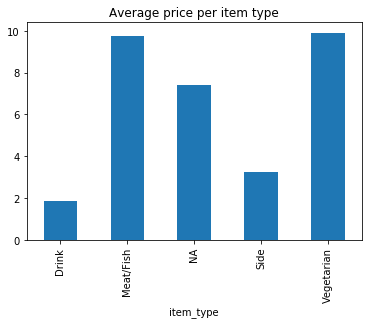

In [57]:
df.groupby('item_type')['Price'].mean().plot(kind='bar', title='Average price per item type')

In [58]:
df.groupby('item_type').item_price.sum()

item_type
Drink          1401.71
Meat/Fish     25230.00
NA               88.80
Side           3775.38
Vegetarian     4004.27
Name: item_price, dtype: float64